In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from matplotlib import pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Your path to data set below
fn = '/content/drive/MyDrive/DataSets/vacancies_2020.csv.gz'
df = pd.read_csv(fn, compression='gzip')
df.head()

,id,description,key_skills,schedule_id,schedule_name,accept_handicapped,accept_kids,experience_id,experience_name,specializations,contacts,billing_type_id,billing_type_name,allow_messages,premium,driver_license_types,accept_incomplete_resumes,employer_id,employer_name,employer_vacancies_url,employer_trusted,employer_alternate_url,employer_industries,response_letter_required,type_id,type_name,has_test,response_url,test_required,salary_from,salary_to,salary_gross,salary_currency,archived,name,insider_interview,area_id,area_name,area_url,created_at,published_at,address_city,address_street,address_building,address_description,address_lat,address_lng,alternate_url,apply_alternate_url,code,department_id,department_name,employment_id,employment_name,prof_classes_found,terms_found
0,30711158,<p><strong>О Компании</strong></p> <p>Мы помог...,NaN,fullDay,Полный день,False,False,between1And3,От 1 года до 3 лет,1.117 Тестирование 1 Информационные технологии...,NaN,standard,Стандарт,True,False,NaN,False,3034828.0,Смарт консалтинг,https://api.hh.ru/vacancies?employer_id=3034828,True,https://hh.ru/employer/3034828,Разработка программного обеспечения,False,open,Открытая,False,NaN,NaN,NaN,NaN,NaN,NaN,False,Тестировщик QA,NaN,4,Новосибирск,https://api.hh.ru/areas/4,2020-10-12T05:18:46+0300,2020-10-12T05:18:46+0300,Новосибирск,Октябрьская магистраль,4,NaN,55.022567,82.930086,https://hh.ru/vacancy/30711158,https://hh.ru/applicant/vacancy_response?vacan...,NaN,NaN,NaN,full,Полная занятость,tester,jmeter спринт тестировщик continuous_integrati...
1,30711538,<p><strong>Vigrom</strong> сегодня – междунаро...,PHP\nSQL\nООП\nPostgreSQL\nMemcached\nSymfony\...,fullDay,Полный день,False,False,between1And3,От 1 года до 3 лет,"1.221 Программирование, Разработка 1 Информаци...",NaN,standard,Стандарт,True,False,NaN,False,1110684.0,Vigrom Corp.,https://api.hh.ru/vacancies?employer_id=1110684,True,https://hh.ru/employer/1110684,"Интернет-компания (поисковики, платежные систе...",False,open,Открытая,False,NaN,NaN,NaN,NaN,NaN,NaN,True,PHP-разработчик,NaN,71,Пенза,https://api.hh.ru/areas/71,2020-01-28T10:52:44+0300,2020-01-28T10:52:44+0300,Пенза,Тамбовская улица,35Б,NaN,53.173614,45.005847,https://hh.ru/vacancy/30711538,https://hh.ru/applicant/vacancy_response?vacan...,NaN,NaN,NaN,full,Полная занятость,programmer,современный_офис memcache team phpunit php арх...
2,30713109,<p>Каждый день миллионы пользователей находят ...,NaN,remote,Удаленная работа,True,False,noExperience,Нет опыта,4.278 Сотрудник call-центра 4 Административный...,NaN,standard,Стандарт,False,False,NaN,True,1740.0,Яндекс,https://api.hh.ru/vacancies?employer_id=1740,True,https://hh.ru/employer/1740,"Интернет-компания (поисковики, платежные систе...",False,open,Открытая,False,NaN,NaN,NaN,NaN,NaN,NaN,True,Оператор саll-центра,NaN,2,Санкт-Петербург,https://api.hh.ru/areas/2,2020-03-21T10:07:10+0300,2020-03-21T10:07:10+0300,NaN,NaN,NaN,NaN,NaN,NaN,https://hh.ru/vacancy/30713109,https://hh.ru/applicant/vacancy_response?vacan...,NaN,NaN,NaN,part,Частичная занятость,operator,яндекс windows_7 гибкий_график
3,30714567,<p><strong>В твоих руках - отличная возможност...,NaN,fullDay,Полный день,False,False,noExperience,Нет опыта,"17.269 Телекоммуникации, Сетевые решения 17 Пр...",NaN,standard,Стандарт,True,False,NaN,False,1217313.0,МегаФон Ритейл,https://api.hh.ru/vacancies?employer_id=1217313,True,https://hh.ru/employer/1217313,Розничная сеть (мобильный ретейл),False,open,Открытая,False,NaN,NaN,23000.0,29000.0,False,RUR,True,Продавец - Консультант офиса продаж и обслужив...,NaN,1395,Копейск,https://api.hh.ru/areas/1395,2020-01-13T12:38:10+0300,2020-01-13T12:38:10+0300,Челябинск,улица Кирова,159,NaN,55.164515,61.401188,https://hh.ru/vacancy/30714567,https://hh.ru/applicant/vacancy_response?vacan...,NaN,NaN,NaN,full,Полная занятость,prodajnik,медицинская_страховка официальное_трудоустройс...
4,30716168,<p><strong>Компания «Северсталь-Инфоком» - цен...,Bash\nPowerShell\nC++\nC#\nJava\nPerl\nPython\...,fullDay,По

In [ ]:
df.shape

(587637, 56)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587637 entries, 0 to 587636
Data columns (total 56 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         587637 non-null  int64  
 1   description                587637 non-null  object 
 2   key_skills                 431738 non-null  object 
 3   schedule_id                587637 non-null  object 
 4   schedule_name              587637 non-null  object 
 5   accept_handicapped         587637 non-null  bool   
 6   accept_kids                587637 non-null  bool   
 7   experience_id              587637 non-null  object 
 8   experience_name            587637 non-null  object 
 9   specializations            587637 non-null  object 
 10  contacts                   12130 non-null   object 
 11  billing_type_id            587637 non-null  object 
 12  billing_type_name          587637 non-null  object 
 13  allow_messages             58

---
# Rename and drop columns
---


In [ ]:
df = df.rename(columns={'schedule_id': 'schedule', 
                        'experience_id': 'experience',
                        'billing_type_id':'billing_type',
                        'type_id': 'type',
                        'department_id': 'department',
                        'employment_id': 'employment',
                        'published_at': 'date'})

In [ ]:
df = df.drop(columns=['billing_type_name', 'schedule_name', 'experience_name', 
                      'type_name', 'address_street', 'address_building', 
                      'address_description', 'address_lat', 'address_lng', 
                      'address_lng', 'contacts', 'driver_license_types', 
                      'response_url', 'insider_interview', 'code', 'department', 
                      'department_name', 'employment_name', 'area_url',
                      'created_at', 'employer_alternate_url', 
                      'apply_alternate_url', 'type', 'billing_type', 
                      'address_city', 'description', 'specializations', 
                      'employer_name', 'employer_vacancies_url', 'alternate_url',
                      'premium', 'employer_id'])

In [ ]:
df.shape

(587637, 25)

---
# Data filtering
---


In [ ]:
df = df[df.archived == 1]

In [ ]:
df = df[(df.salary_from.isna() == False) & (df.salary_to.isna() == False) & (df.key_skills.isna() == False)]

In [ ]:
df.prof_classes_found.value_counts().head()

programmer    23834
prodajnik      8757
support        5886
sysadmin       4885
specialist     3921
Name: prof_classes_found, dtype: int64

In [ ]:
df = df[df.prof_classes_found != 'prodajnik']
df = df[df.prof_classes_found != 'montajnik']
df = df[df.prof_classes_found != 'teacher']
df = df[df.prof_classes_found != 'just_work']
df = df[df.prof_classes_found != 'montajnik electric']
df = df[df.prof_classes_found != 'rukovoditel_zam']
df = df[df.prof_classes_found != 'prodajnik electric']
df = df[df.prof_classes_found != 'electric']
df = df[(df.prof_classes_found != 'prodajnik technic')]
df = df[df.employment != 'volunteer']

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.shape

(75384, 25)

In [ ]:
df = df.drop(columns='archived')

In [ ]:
df.head()

,id,key_skills,schedule,accept_handicapped,accept_kids,experience,allow_messages,accept_incomplete_resumes,employer_trusted,employer_industries,response_letter_required,has_test,test_required,salary_from,salary_to,salary_gross,salary_currency,name,area_id,area_name,date,employment,prof_classes_found,terms_found
0,33721414,Активные продажи\nХолодные продажи\nПрямые про...,fullDay,False,False,noExperience,True,False,True,Интернет-провайдер\nОптоволоконная связь\nФикс...,False,False,NaN,14000.0,50000.0,True,RUR,Агент по сбору заявок на подключение,52,Кострома,2020-02-03T09:05:56+0300,full,NaN,дружный_коллектив опыт_работы
1,33723735,B2B Продажи\nВедение переговоров,fullDay,False,False,noExperience,True,True,True,Оптоволоконная связь\nФиксированная связь,False,False,NaN,35000.0,60000.0,False,RUR,Менеджер по работе с корпоративными клиентами,1753,Череповец,2020-01-15T10:44:35+0300,full,support,комфортный_офис power_point менеджер_по_продаж...
2,36620015,Windows 7\nВысокая скорость печати\nWindows Os...,fullDay,False,False,between3And6,True,False,True,NaN,False,False,NaN,30000.0,35000.0,False,RUR,Инженер-программист,90,Томск,2020-04-10T12:40:35+0300,full,programmer,высшее_образование windows_7 windows_2003 тест...
3,36620022,Atlassian Jira\nSQL\nБазы данных\nРазработка т...,fullDay,False,False,between1And3,True,False,True,"Системная интеграция, автоматизации технологи...",False,False,NaN,45000.0,73000.0,True,RUR,Системный аналитик,90,Томск,2020-04-10T12:40:57+0300,full,analyst,высшее_образование site разработчик google_ana...
4,36620106,JavaScript\nReact\nReactNative,fullDay,False,False,between3And6,True,False,True,"Научно-исследовательская, научная, академическ...",False,False,NaN,150000.0,200000.0,False,RUR,Frontend developer (React),1,Москва,2020-04-10T12:47:20+0300,full,programmer,разработчик react медицинская_страховка опыт_р...


---
# Change a Categorical data
---


In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [ ]:
onehot_encoder = OneHotEncoder(sparse=False)

In [ ]:
# Change a boolean value
df["accept_handicapped"]        = df["accept_handicapped"].replace([False, True], [0, 1])
df["accept_kids"]               = df["accept_kids"].replace([False, True], [0, 1])
df["allow_messages"]            = df["allow_messages"].replace([False, True], [0, 1])
df["accept_incomplete_resumes"] = df["accept_incomplete_resumes"].replace([False, True], [0, 1])
df["response_letter_required"]  = df["response_letter_required"].replace([False, True], [0, 1])
df["has_test"]                  = df["has_test"].replace([False, True], [0, 1])

In [ ]:
# Change a object value
df["employer_trusted"] = df["employer_trusted"].replace([False, True], [0, 1])
df["test_required"]    = df["test_required"].replace([False, True], [0, 1])
df["salary_gross"]     = df["salary_gross"].replace([False, True], [0, 1])

In [ ]:
df.head(1)

,id,key_skills,schedule,accept_handicapped,accept_kids,experience,allow_messages,accept_incomplete_resumes,employer_trusted,employer_industries,response_letter_required,has_test,test_required,salary_from,salary_to,salary_gross,salary_currency,name,area_id,area_name,date,employment,prof_classes_found,terms_found
0,33721414,Активные продажи\nХолодные продажи\nПрямые про...,fullDay,0,0,noExperience,1,0,1.0,Интернет-провайдер\nОптоволоконная связь\nФикс...,0,0,NaN,14000.0,50000.0,1.0,RUR,Агент по сбору заявок на подключение,52,Кострома,2020-02-03T09:05:56+0300,full,NaN,дружный_коллектив опыт_работы


---
### OneHotEncoder for the "schedule" column
---


In [ ]:
df.schedule.value_counts()

fullDay        53464
remote         13539
flexible        4924
shift           2258
flyInFlyOut     1199
Name: schedule, dtype: int64

In [ ]:
df.id[df.schedule.isna() == True].count()

0

In [ ]:
schd = pd.DataFrame(onehot_encoder.fit_transform(df[['schedule']]))
schd = schd.rename(columns={0: 'schedule_flexible', 1: 'schedule_flyInFlyOut', 
                            2: 'schedule_fullDay', 3: 'schedule_remote', 
                            4: 'schedule_shift'})

In [ ]:
schd.shape

(75384, 5)

In [ ]:
df['schedule_flexible']    = schd.schedule_flexible
df['schedule_flyInFlyOut'] = schd.schedule_flyInFlyOut
df['schedule_fullDay']     = schd.schedule_fullDay
df['schedule_remote']   = schd.schedule_remote
df['schedule_shift']   = schd.schedule_shift

In [ ]:
df.head(1)

,id,key_skills,schedule,accept_handicapped,accept_kids,experience,allow_messages,accept_incomplete_resumes,employer_trusted,employer_industries,response_letter_required,has_test,test_required,salary_from,salary_to,salary_gross,salary_currency,name,area_id,area_name,date,employment,prof_classes_found,terms_found,schedule_flexible,schedule_flyInFlyOut,schedule_fullDay,schedule_remote,schedule_shift
0,33721414,Активные продажи\nХолодные продажи\nПрямые про...,fullDay,0,0,noExperience,1,0,1.0,Интернет-провайдер\nОптоволоконная связь\nФикс...,0,0,NaN,14000.0,50000.0,1.0,RUR,Агент по сбору заявок на подключение,52,Кострома,2020-02-03T09:05:56+0300,full,NaN,дружный_коллектив опыт_работы,0.0,0.0,1.0,0.0,0.0


In [ ]:
df = df.drop(columns='schedule')

In [ ]:
df.shape

(75384, 28)

---
### OneHotEncoder for the "employment" column
---

In [ ]:
df.id[df.employment.isna() == True].count()

0

In [ ]:
empl = pd.DataFrame(onehot_encoder.fit_transform(df[['employment']]))
empl = empl.rename(columns={0 : 'employment_full', 1: 'employment_part', 
                            2: 'employment_probation', 3: 'employment_project'})
empl.shape

(75384, 4)

In [ ]:
df['employment_full']      = empl.employment_full
df['employment_part']      = empl.employment_part
df['employment_probation'] = empl.employment_probation
df['employment_project']   = empl.employment_project

In [ ]:
df = df.drop(columns='employment')

In [ ]:
df.head(1)

,id,key_skills,accept_handicapped,accept_kids,experience,allow_messages,accept_incomplete_resumes,employer_trusted,employer_industries,response_letter_required,has_test,test_required,salary_from,salary_to,salary_gross,salary_currency,name,area_id,area_name,date,prof_classes_found,terms_found,schedule_flexible,schedule_flyInFlyOut,schedule_fullDay,schedule_remote,schedule_shift,employment_full,employment_part,employment_probation,employment_project
0,33721414,Активные продажи\nХолодные продажи\nПрямые про...,0,0,noExperience,1,0,1.0,Интернет-провайдер\nОптоволоконная связь\nФикс...,0,0,NaN,14000.0,50000.0,1.0,RUR,Агент по сбору заявок на подключение,52,Кострома,2020-02-03T09:05:56+0300,NaN,дружный_коллектив опыт_работы,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


---
### OneHotEncoder for the "area_name" column 
---


In [ ]:
df.area_name.value_counts().head(26)

Москва             20075
Санкт-Петербург     8202
Новосибирск         2597
Екатеринбург        2172
Минск               1927
Казань              1823
Алматы              1675
Краснодар           1662
Нижний Новгород     1598
Ростов-на-Дону      1373
Киев                1079
Воронеж             1069
Самара              1010
Пермь                990
Челябинск            975
Красноярск           952
Нур-Султан           912
Уфа                  831
Томск                774
Тюмень               687
Омск                 670
Владивосток          622
Тула                 609
Саратов              584
Волгоград            584
Ташкент              511
Name: area_name, dtype: int64

In [ ]:
df.shape

(75384, 31)

In [ ]:
df.id[df.area_name.isna() == True].count()

0

In [ ]:
df_moskow = df[df.area_name == 'Москва']
df_spb = df[df.area_name == 'Санкт-Петербург']
df_novosib = df[df.area_name == 'Новосибирск']
df_ekb = df[df.area_name == 'Екатеринбург']
df_minsk = df[df.area_name == 'Минск']
df_kazan = df[df.area_name == 'Казань']
df_almaty = df[df.area_name == 'Алматы']
df_krasnodar = df[df.area_name == 'Краснодар']
df_nnovgorod = df[df.area_name == 'Нижний Новгород']
df_rostov = df[df.area_name == 'Ростов-на-Дону']
df_kiev = df[df.area_name == 'Киев']
df_voronezh = df[df.area_name == 'Воронеж']
df_samara = df[df.area_name == 'Самара']
df_perm = df[df.area_name == 'Пермь']
df_chelyabinsk = df[df.area_name == 'Челябинск']
df_krasnoyarsk = df[df.area_name == 'Красноярск']
df_nur_sultan = df[df.area_name == 'Нур-Султан']
df_ufa = df[df.area_name == 'Уфа']
df_tomsk = df[df.area_name == 'Томск']
df_tyumen = df[df.area_name == 'Тюмень']
df_omsk = df[df.area_name == 'Омск']
df_vladivostok = df[df.area_name == 'Владивосток']
df_tula = df[df.area_name == 'Тула']
df_volgograd = df[df.area_name == 'Волгоград']
df_saratov = df[df.area_name == 'Саратов']
df_tashkent = df[df.area_name == 'Ташкент']

In [ ]:
df_city = df_moskow.append(df_spb).append(df_novosib).append(df_ekb).append(df_minsk) \
.append(df_kazan).append(df_almaty).append(df_krasnodar).append(df_nnovgorod) \
.append(df_rostov).append(df_kiev).append(df_voronezh) \
.append(df_samara).append(df_perm).append(df_chelyabinsk).append(df_krasnoyarsk) \
.append(df_nur_sultan).append(df_ufa).append(df_tomsk).append(df_tyumen) \
.append(df_omsk).append(df_vladivostok).append(df_tula).append(df_volgograd) \
.append(df_saratov).append(df_tashkent)

In [ ]:
df_city.shape

(55963, 31)

In [ ]:
df_city = df_city.reset_index(drop=True)
df = df_city

In [ ]:
city = pd.DataFrame(onehot_encoder.fit_transform(df_city[['area_name']]))
city = city.rename(columns={0: 'almaty', 1: 'vladivostok', 2: 'volgograd',  3: 'voronezh', 4: 'ekaterinburg', 5: 'kazan', \
                            6: 'kiev', 7: 'krasnodar', 8: 'krasnoyarsk', 9: 'minsk', 10: 'moskow', \
                            11: 'nizhny_novgorod', 12: 'novosibirsk', 13: 'nur_sultan', 15: 'perm', 14: 'omsk', 16: 'rostov_on_don', \
                            17: 'samara', 18: 'st_petersburg', 19: 'saratov', 20: 'tashkent', 21: 'tomsk', 22: 'tula', 23: 'tyumen', 24: 'ufa',  25: 'chelyabinsk'})

In [ ]:
city.columns

Index(['almaty', 'vladivostok', 'volgograd', 'voronezh', 'ekaterinburg',
       'kazan', 'kiev', 'krasnodar', 'krasnoyarsk', 'minsk', 'moskow',
       'nizhny_novgorod', 'novosibirsk', 'nur_sultan', 'omsk', 'perm',
       'rostov_on_don', 'samara', 'st_petersburg', 'saratov', 'tashkent',
       'tomsk', 'tula', 'tyumen', 'ufa', 'chelyabinsk'],
      dtype='object')

In [ ]:
df['almaty']          = city.almaty
df['vladivostok']     = city.vladivostok
df['volgograd']       = city.volgograd
df['voronezh']        = city.voronezh
df['ekaterinburg']    = city.ekaterinburg
df['kazan']           = city.kazan
df['kiev']            = city.kiev
df['krasnodar']       = city.krasnodar
df['krasnoyarsk']     = city.krasnoyarsk
df['minsk']           = city.minsk
df['moskow']          = city.moskow
df['nizhny_novgorod'] = city.nizhny_novgorod
df['novosibirsk']     = city.novosibirsk
df['nur-sultan']      = city.nur_sultan
df['omsk']            = city.omsk
df['perm']            = city.perm
df['rostov_on_don']   = city.rostov_on_don
df['samara']          = city.samara
df['st_petersburg']   = city.st_petersburg
df['saratov']         = city.saratov
df['tashkent']        = city.tashkent
df['tomsk']           = city.tomsk
df['tula']            = city.tula
df['tyumen']          = city.tyumen
df['ufa']             = city.ufa
df['chelyabinsk']     = city.chelyabinsk

In [ ]:
df = df.drop(columns='area_name')

In [ ]:
df.shape

(55963, 56)

In [ ]:
df.head()

,id,key_skills,accept_handicapped,accept_kids,experience,allow_messages,accept_incomplete_resumes,employer_trusted,employer_industries,response_letter_required,has_test,test_required,salary_from,salary_to,salary_gross,salary_currency,name,area_id,date,prof_classes_found,terms_found,schedule_flexible,schedule_flyInFlyOut,schedule_fullDay,schedule_remote,schedule_shift,employment_full,employment_part,employment_probation,employment_project,almaty,vladivostok,volgograd,voronezh,ekaterinburg,kazan,kiev,krasnodar,krasnoyarsk,minsk,moskow,nizhny_novgorod,novosibirsk,nur-sultan,omsk,perm,rostov_on_don,samara,st_petersburg,saratov,tashkent,tomsk,tula,tyumen,ufa,chelyabinsk
0,36620106,JavaScript\nReact\nReactNative,0,0,between3And6,1,0,1.0,"Научно-исследовательская, научная, академическ...",0,0,NaN,150000.0,200000.0,0.0,RUR,Frontend developer (React),1,2020-04-10T12:47:20+0300,programmer,разработчик react медицинская_страховка опыт_р...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36620535,Информационная безопасность\nMS Visio\nРазрабо...,0,0,between1And3,1,0,1.0,Государственные организации\nРазработка програ...,1,0,NaN,70000.0,100000.0,1.0,RUR,Советник отдела информационной безопасности,1,2020-04-10T13:17:56+0300,it_security,разработка информационная_безопасность опыт_ра...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36620748,C++\nУмение принимать решения\nQt\nCистемы упр...,0,0,between3And6,1,0,1.0,NaN,0,0,NaN,100000.0,200000.0,0.0,RUR,Программист C/С++,1,2020-05-07T13:32:58+0300,programmer,комфортный_офис кофе team дружный_коллектив вк...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36620797,Linux\nSQL\nООП,0,0,between1And3,1,0,1.0,Банк,0,0,NaN,145000.0,180000.0,0.0,RUR,Golang developer,1,2020-07-15T11:12:40+0300,programmer,высшее_образование разработчик высоконагруженн...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,36620865,ООП\nSQL\nPHP,0,0,between1And3,1,0,1.0,Банк,0,0,NaN,145000.0,180000.0,0.0,RUR,PHP-разработчик (backend),1,2020-04-23T17:41:30+0300,programmer,высшее_образование кухня symfony rest php план...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---
### OrdinalEncoder for the "experience" column
---

In [ ]:
df.experience.value_counts()

between1And3    29294
between3And6    14974
noExperience    10230
moreThan6        1465
Name: experience, dtype: int64

In [ ]:
df.id[df.experience.isna() == True].count()

0

In [ ]:
ordinal_encoder = OrdinalEncoder(categories=[['noExperience', 'between1And3',
                                             'between3And6', 'moreThan6']])

In [ ]:
expr = pd.DataFrame(ordinal_encoder.fit_transform(df[['experience']]))

In [ ]:
expr = expr.rename(columns={0: 'experience'})

In [ ]:
df.experience.head()

0    between3And6
1    between1And3
2    between3And6
3    between1And3
4    between1And3
Name: experience, dtype: object

In [ ]:
expr.head()

,experience
0,2.0
1,1.0
2,2.0
3,1.0
4,1.0


In [ ]:
df['experience'] = expr

In [ ]:
df.head(1)

,id,key_skills,accept_handicapped,accept_kids,experience,allow_messages,accept_incomplete_resumes,employer_trusted,employer_industries,response_letter_required,has_test,test_required,salary_from,salary_to,salary_gross,salary_currency,name,area_id,date,prof_classes_found,terms_found,schedule_flexible,schedule_flyInFlyOut,schedule_fullDay,schedule_remote,schedule_shift,employment_full,employment_part,employment_probation,employment_project,almaty,vladivostok,volgograd,voronezh,ekaterinburg,kazan,kiev,krasnodar,krasnoyarsk,minsk,moskow,nizhny_novgorod,novosibirsk,nur-sultan,omsk,perm,rostov_on_don,samara,st_petersburg,saratov,tashkent,tomsk,tula,tyumen,ufa,chelyabinsk
0,36620106,JavaScript\nReact\nReactNative,0,0,2.0,1,0,1.0,"Научно-исследовательская, научная, академическ...",0,0,NaN,150000.0,200000.0,0.0,RUR,Frontend developer (React),1,2020-04-10T12:47:20+0300,programmer,разработчик react медицинская_страховка опыт_р...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---
# Convert a currency
---


## Format a column "published_at" to format 'YYYY-MM-DD' in code below

In [ ]:
df["date"] = pd.to_datetime(df["date"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55963 entries, 0 to 55962
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype                                
---  ------                     --------------  -----                                
 0   id                         55963 non-null  int64                                
 1   key_skills                 55963 non-null  object                               
 2   accept_handicapped         55963 non-null  int64                                
 3   accept_kids                55963 non-null  int64                                
 4   experience                 55963 non-null  float64                              
 5   allow_messages             55963 non-null  int64                                
 6   accept_incomplete_resumes  55963 non-null  int64                                
 7   employer_trusted           55842 non-null  float64                              
 8   employer_industries       

In [ ]:
df["date"] = df["date"].dt.strftime("%Y-%m-%d")

In [ ]:
df.head(1)

,id,key_skills,accept_handicapped,accept_kids,experience,allow_messages,accept_incomplete_resumes,employer_trusted,employer_industries,response_letter_required,has_test,test_required,salary_from,salary_to,salary_gross,salary_currency,name,area_id,date,prof_classes_found,terms_found,schedule_flexible,schedule_flyInFlyOut,schedule_fullDay,schedule_remote,schedule_shift,employment_full,employment_part,employment_probation,employment_project,almaty,vladivostok,volgograd,voronezh,ekaterinburg,kazan,kiev,krasnodar,krasnoyarsk,minsk,moskow,nizhny_novgorod,novosibirsk,nur-sultan,omsk,perm,rostov_on_don,samara,st_petersburg,saratov,tashkent,tomsk,tula,tyumen,ufa,chelyabinsk
0,36620106,JavaScript\nReact\nReactNative,0,0,2.0,1,0,1.0,"Научно-исследовательская, научная, академическ...",0,0,NaN,150000.0,200000.0,0.0,RUR,Frontend developer (React),1,2020-04-10,programmer,разработчик react медицинская_страховка опыт_р...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Work with currency

In [ ]:
df.salary_currency.value_counts()

RUR    48357
USD     2713
KZT     2473
BYR     1129
UAH      485
EUR      433
UZS      371
KGS        2
Name: salary_currency, dtype: int64

In [ ]:
kzt = pd.read_csv('/content/drive/MyDrive/DataSets/Currencies/KZT_RUB.csv')
usd = pd.read_csv('/content/drive/MyDrive/DataSets/Currencies/USD_RUB.csv')
byr = pd.read_csv('/content/drive/MyDrive/DataSets/Currencies/BYN_RUB.csv')
uah = pd.read_csv('/content/drive/MyDrive/DataSets/Currencies/UAH_RUB.csv')
eur = pd.read_csv('/content/drive/MyDrive/DataSets/Currencies/EUR_RUB.csv')
uzs = pd.read_csv('/content/drive/MyDrive/DataSets/Currencies/UZS_RUB.csv')
kgs = pd.read_csv('/content/drive/MyDrive/DataSets/Currencies/KGS_RUB.csv')
azn = pd.read_csv('/content/drive/MyDrive/DataSets/Currencies/AZN_RUB.csv')
gel = pd.read_csv('/content/drive/MyDrive/DataSets/Currencies/GEL_RUB.csv')

In [ ]:
def remove_column_currency(df):
  df = df.rename(columns={'Change %': 'Change_%', 'Date': 'date', 'Price': 'price'})
  df = df.drop(columns=['Open', 'High', 'Low', 'Change_%'])
  return df

In [ ]:
def convert_datetime(df):
  df.date = pd.to_datetime(df.date).dt.strftime('%Y-%m-%d')
  return df

In [ ]:
kzt = remove_column_currency(kzt)
usd = remove_column_currency(usd)
byr = remove_column_currency(byr)
uah = remove_column_currency(uah)
eur = remove_column_currency(eur)
uzs = remove_column_currency(uzs)
kgs = remove_column_currency(kgs)
azn = remove_column_currency(azn)
gel = remove_column_currency(gel)

In [ ]:
kzt = convert_datetime(kzt)
usd = convert_datetime(usd)
byr = convert_datetime(byr)
uah = convert_datetime(uah)
eur = convert_datetime(eur)
uzs = convert_datetime(uzs)
kgs = convert_datetime(kgs)
azn = convert_datetime(azn)
gel = convert_datetime(gel)

In [ ]:
kzt.head(3)

,date,price
0,2021-01-01,0.1757
1,2020-12-31,0.1766
2,2020-12-30,0.1765


In [ ]:
df_kzt = df[df.salary_currency == 'KZT'].merge(kzt, how='left', on='date')
df_usd = df[df.salary_currency == 'USD'].merge(usd, how='left', on='date')
df_byr = df[df.salary_currency == 'BYR'].merge(byr, how='left', on='date')
df_uah = df[df.salary_currency == 'UAH'].merge(uah, how='left', on='date')
df_eur = df[df.salary_currency == 'EUR'].merge(eur, how='left', on='date')
df_uzs = df[df.salary_currency == 'UZS'].merge(uzs, how='left', on='date')
df_kgs = df[df.salary_currency == 'KGS'].merge(kgs, how='left', on='date')
df_azn = df[df.salary_currency == 'AZN'].merge(azn, how='left', on='date')
df_gel = df[df.salary_currency == 'GEL'].merge(gel, how='left', on='date')

df_rouble = df[df.salary_currency == 'RUR']
df_rouble['price'] = [1 for i in range(len(df_rouble))]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
display(df_kzt.id[df_kzt.salary_currency.isna() == True].count())
display(df_usd.id[df_usd.salary_currency.isna() == True].count())
display(df_byr.id[df_byr.salary_currency.isna() == True].count())
display(df_uah.id[df_uah.salary_currency.isna() == True].count())
display(df_eur.id[df_eur.salary_currency.isna() == True].count())
display(df_uzs.id[df_uzs.salary_currency.isna() == True].count())
display(df_kgs.id[df_kgs.salary_currency.isna() == True].count())
display(df_azn.id[df_azn.salary_currency.isna() == True].count())
display(df_gel.id[df_gel.salary_currency.isna() == True].count())

0

0

0

0

0

0

0

0

0

In [ ]:
df1 = df_kzt.append(df_usd).append(df_byr).append(df_uah).append(df_eur).append(df_uzs).append(df_kgs).append(df_azn).append(df_gel).append(df_rouble)

In [ ]:
df1['salary_from'] = df1['salary_from'] * df1['price']
df1['salary_to'] = df1['salary_to'] * df1['price']

In [ ]:
df = df1.drop(columns=['price', 'salary_currency'])

In [ ]:
df.head(1)

,id,key_skills,accept_handicapped,accept_kids,experience,allow_messages,accept_incomplete_resumes,employer_trusted,employer_industries,response_letter_required,has_test,test_required,salary_from,salary_to,salary_gross,name,area_id,date,prof_classes_found,terms_found,schedule_flexible,schedule_flyInFlyOut,schedule_fullDay,schedule_remote,schedule_shift,employment_full,employment_part,employment_probation,employment_project,almaty,vladivostok,volgograd,voronezh,ekaterinburg,kazan,kiev,krasnodar,krasnoyarsk,minsk,moskow,nizhny_novgorod,novosibirsk,nur-sultan,omsk,perm,rostov_on_don,samara,st_petersburg,saratov,tashkent,tomsk,tula,tyumen,ufa,chelyabinsk
0,36625264,1С-Битрикс\nPHP\nREST\nООП\nHTML5\nCSS3\nТехни...,1,0,2.0,1,0,1.0,"Земледелие, растениеводство, животноводство",1,0,NaN,70240.0,136968.0,0.0,Битрикс-разработчик,1,2020-05-07,programmer,1c site разработчик rpc rest php архитектура а...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(55963, 55)

## Outliers

Conclusions regarding the correctness of the values were based on the knowledge of the domain.

In [ ]:
min_salary_from, max_salary_from = df['salary_from'].quantile([0.008, 0.994])
min_salary_from, max_salary_from

(10000.0, 861597.030000023)

In [ ]:
min_salary_to, max_salary_to = df['salary_to'].quantile([0.001, 0.999])
min_salary_to, max_salary_to

(6043.726980000001, 735298270.6400115)

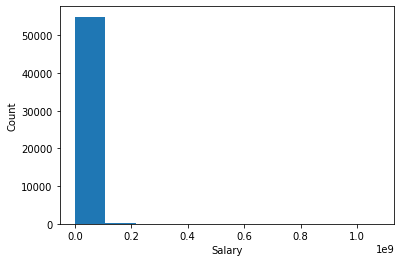

In [ ]:
plt.hist(df.salary_from[df['salary_from'] < df['salary_from'].quantile(1)])
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

In [ ]:
df = df[df['salary_from'] < max_salary_from]

In [ ]:
df = df[df['salary_from'] > min_salary_from]

In [ ]:
df = df[df['salary_to'] < max_salary_to]

In [ ]:
df = df[df['salary_to'] > min_salary_to]

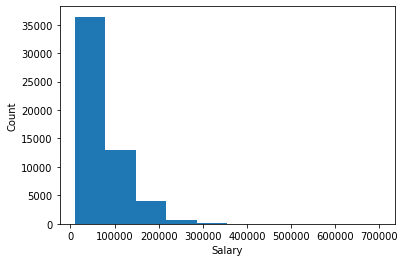

In [ ]:
plt.hist(df.salary_from[df['salary_from'] < df['salary_from'].quantile(1)])
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()